In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
HF_TOKEN = "your_token"  # 🔒 Replace with your token

#1. Concatenate news-summarization files

In [ ]:
original_news_df = "/content/drive/My Drive/NCKH/news_data/03_primary/total_news.parquet"
news_df0 = "/content/drive/My Drive/NCKH/news_data/generated_summary_checkpoint.parquet"
news_df1 = "/content/drive/My Drive/NCKH/news_data/generated_summary_checkpoint_1.parquet"
news_df2 = "/content/drive/My Drive/NCKH/news_data/generated_summary_checkpoint_2.parquet"
news_df3 = "/content/drive/My Drive/NCKH/news_data/generated_summary_checkpoint_3.parquet"
news_df0 = pd.read_parquet(news_df0)
news_df1 = pd.read_parquet(news_df1)
news_df2 = pd.read_parquet(news_df2)
news_df3 = pd.read_parquet(news_df3)
original_news_df = pd.read_parquet(original_news_df)


In [ ]:
news_df0

,author,content,datetime,source,summary,title,url,date,equity,hf_summary
0,Jayson Derrick,WeWork is postponing its initial public offeri...,2019-09-17 17:26:14,benzinga,WeWork is postponing its initial public offeri...,Analyst On WeWork: High Growth Equals High Cas...,https://www.benzinga.com/analyst-ratings/analy...,2019-09-18 17:26:14,MSFT,"WeWork, a shared-workspace provider, has put i..."
1,Shanthi Rexaline,Microsoft Corporation (NASDAQ: MSFT ) reported...,2020-04-30 15:47:08,benzinga,Microsoft Corporation (NASDAQ: MSFT) reported ...,Microsoft Analysts On Redmond's Q3 Beat: 'A Co...,https://www.benzinga.com/analyst-ratings/analy...,2020-04-30 15:47:08,MSFT,**Key Events:**\n\n* Microsoft Corporation (MS...
2,Tanzeel Akhtar,Editor's note: This story has been updated to ...,2020-05-13 16:32:36,benzinga,Editor&#39;s note: This story has been updated...,What To Know About The Conflicting AMC Enterta...,https://www.benzinga.com/m-a/20/05/16014823/wh...,2020-05-14 16:32:36,AMZN,Key facts for financial investors:\n\n- AMC En...
3,Chris Katje,Despite a wealth of 162.8 billion and title of...,2021-06-25 16:30:26,benzinga,Despite a wealth of $162.8 billion and title o...,Did Billionaire Elon Musk Sell All His Mansion...,https://www.benzinga.com/news/21/06/21714362/d...,2021-06-26 16:30:26,TSLA,Elon Musk's real estate portfolio is shrinking...
4,Phil Hall,Elon Musk has taken his last remaining house o...,2021-09-20 15:52:05,benzinga,Elon Musk has taken his “last remaining house”...,Elon Musk Fails To Get Buyer For $37.5M Bay Ar...,https://www.benzinga.com/news/21/09/23013145/e...,2021-09-20 15:52:05,TSLA,Key points for financial investors:\n\n- The 1...
...,...,...,...,...,...,...,...,...,...,...
2995,Anan Ashraf,Tesla Inc (NASDAQ: TSLA ) CEO Elon Musk on Sun...,2023-12-04 03:16:07,benzinga,,Tesla CEO Elon Musk Reacts To Video Featuring ...,https://www.benzinga.com/news/23/12/36062758/t...,2023-12-04 03:16:07,TSLA,Key events:\n\n* Musk expressed concerns abo...
2996,Ananya Gairola,"Yann LeCun , the AI chief of Meta Platforms In...",2023-12-04 06:46:50,benzinga,His viewpoint differed significantly from that...,Meta's AI Chief Definitely Thinks We're Overes...,https://www.benzinga.com/news/23/12/36063417/m...,2023-12-04 06:46:50,MSFT,Key Events: \n- Yann LeCun expressed skepticis...
2997,Benzinga Neuro,"Ahead of 2024, investors exhibit a rising sens...",2023-12-04 06:50:22,benzinga,The Bloomberg Markets Live Pulse survey reveal...,"A Stellar 2023 For S&P 500, Yet 2024 Looks Bri...",https://www.benzinga.com/analyst-ratings/analy...,2023-12-04 06:50:22,AMZN,Key events and developments for financial inve...
2998,Benzinga Neuro,"Ahead of 2024, investors exhibit a rising sens...",2023-12-04 06:50:22,benzinga,The Bloomberg Markets Live Pulse survey reveal...,"A Stellar 2023 For S&P 500, Yet 2024 Looks Bri...",https://www.benzinga.com/analyst-ratings/analy...,2023-12-04 06:50:22,MSFT,Key events and developments:\n\n* A recent B...


In [ ]:
type(news_df0)

pandas.core.frame.DataFrame

In [ ]:
print(len(original_news_df))

24338


In [ ]:
print(len(news_df0))
print(len(news_df1))
print(len(news_df2))
print(len(news_df3))

3000
3000
10000
8338


In [ ]:
news_df = pd.concat([news_df0, news_df1, news_df2, news_df3], ignore_index=True)

In [ ]:
news_df.head()

,author,content,datetime,source,summary,title,url,date,equity,hf_summary
0,Jayson Derrick,WeWork is postponing its initial public offeri...,2019-09-17 17:26:14,benzinga,WeWork is postponing its initial public offeri...,Analyst On WeWork: High Growth Equals High Cas...,https://www.benzinga.com/analyst-ratings/analy...,2019-09-18 17:26:14,MSFT,"WeWork, a shared-workspace provider, has put i..."
1,Shanthi Rexaline,Microsoft Corporation (NASDAQ: MSFT ) reported...,2020-04-30 15:47:08,benzinga,Microsoft Corporation (NASDAQ: MSFT) reported ...,Microsoft Analysts On Redmond's Q3 Beat: 'A Co...,https://www.benzinga.com/analyst-ratings/analy...,2020-04-30 15:47:08,MSFT,**Key Events:**\n\n* Microsoft Corporation (MS...
2,Tanzeel Akhtar,Editor's note: This story has been updated to ...,2020-05-13 16:32:36,benzinga,Editor&#39;s note: This story has been updated...,What To Know About The Conflicting AMC Enterta...,https://www.benzinga.com/m-a/20/05/16014823/wh...,2020-05-14 16:32:36,AMZN,Key facts for financial investors:\n\n- AMC En...
3,Chris Katje,Despite a wealth of 162.8 billion and title of...,2021-06-25 16:30:26,benzinga,Despite a wealth of $162.8 billion and title o...,Did Billionaire Elon Musk Sell All His Mansion...,https://www.benzinga.com/news/21/06/21714362/d...,2021-06-26 16:30:26,TSLA,Elon Musk's real estate portfolio is shrinking...
4,Phil Hall,Elon Musk has taken his last remaining house o...,2021-09-20 15:52:05,benzinga,Elon Musk has taken his “last remaining house”...,Elon Musk Fails To Get Buyer For $37.5M Bay Ar...,https://www.benzinga.com/news/21/09/23013145/e...,2021-09-20 15:52:05,TSLA,Key points for financial investors:\n\n- The 1...


In [ ]:
print(news_df['hf_summary'][20000])


for the stock Amazon, summarize the following news article in no more than 140 words. Focus on key factual events, quantitative figures (e.g., earnings, percentage changes, dates), material risks, relevant corporate actions, regulatory developments, or market sentiment that could impact Amazon's stock price. Ensure all information is directly from the article and accurately reported, especially numerical figures. Avoid speculation, assumptions, or vague generalizations. Do not include opinions or inferred conclusions not directly supported by the source text.

Article:
BERLIN, Feb 15 (Reuters) - Australian actor Jacob Elordi, known for "Euphoria," said the drastic weight loss he endured for his role in the new prisoner-of-war drama "The Narrow Road to the Deep North" was made bearable by support from the rest of the cast. "It was a very calming experience to do it with all the lads," he told journalists on Saturday at the Berlin Film Festival, where the Australian TV series is screeni

In [ ]:
def extract_summary(text):
  """
  Extracts the summary part from the hf_summary string.

  Args:
    text: The string from the 'hf_summary' column.

  Returns:
    The summary part of the string, or the original text if 'Summary:' is not found
    or the input is not a string.
  """
  if not isinstance(text, str):
    return text  # Return original value if not a string

  summary_start = text.find("Summary:")
  if summary_start != -1:
    return text[summary_start + len("Summary:"):].strip()
  else:
    return text # Return original text if "Summary:" is not found

In [ ]:
news_df['extracted_summary'] = news_df['hf_summary'].apply(extract_summary)
display(news_df[['hf_summary', 'extracted_summary']].head())

,hf_summary,extracted_summary
0,"WeWork, a shared-workspace provider, has put i...","WeWork, a shared-workspace provider, has put i..."
1,**Key Events:**\n\n* Microsoft Corporation (MS...,**Key Events:**\n\n* Microsoft Corporation (MS...
2,Key facts for financial investors:\n\n- AMC En...,Key facts for financial investors:\n\n- AMC En...
3,Elon Musk's real estate portfolio is shrinking...,Elon Musk's real estate portfolio is shrinking...
4,Key points for financial investors:\n\n- The 1...,Key points for financial investors:\n\n- The 1...


In [ ]:
print(news_df['extracted_summary'][20000])

Amazon Prime Video will release the Australian TV series "The Narrow Road to the Deep North" on April 18, 2023, in Australia, New Zealand, and Canada. The series will be available on Amazon Prime Video. No specific information is provided about Amazon's stock price or potential impact on it. The article does not mention any quantitative figures or material risks related to Amazon's business. The article is about a movie release on Amazon Prime Video, not Amazon's stock performance. 

Since the article does not provide any relevant information about Amazon's stock price, corporate actions, regulatory developments, or market sentiment, the following text is provided as a placeholder:

There is no relevant information provided in the article about Amazon's stock price or its potential impact. If you would like to know the current stock price or any other information about Amazon, please let me know and I will search for it and provide the information in a neutral and factual manner. 

If 

#2. Analysis

##a. News token length vs Summary token length

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token has not been saved to git credential helper.


In [ ]:
from transformers import AutoTokenizer
model_ckpt = 'meta-llama/Llama-3.2-3B-Instruct'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
#encode the [content] length
c_len = [len(tokenizer.encode(c)) for c in news_df['content']]
s_len = [len(tokenizer.encode(c)) for c in news_df['extracted_summary']]

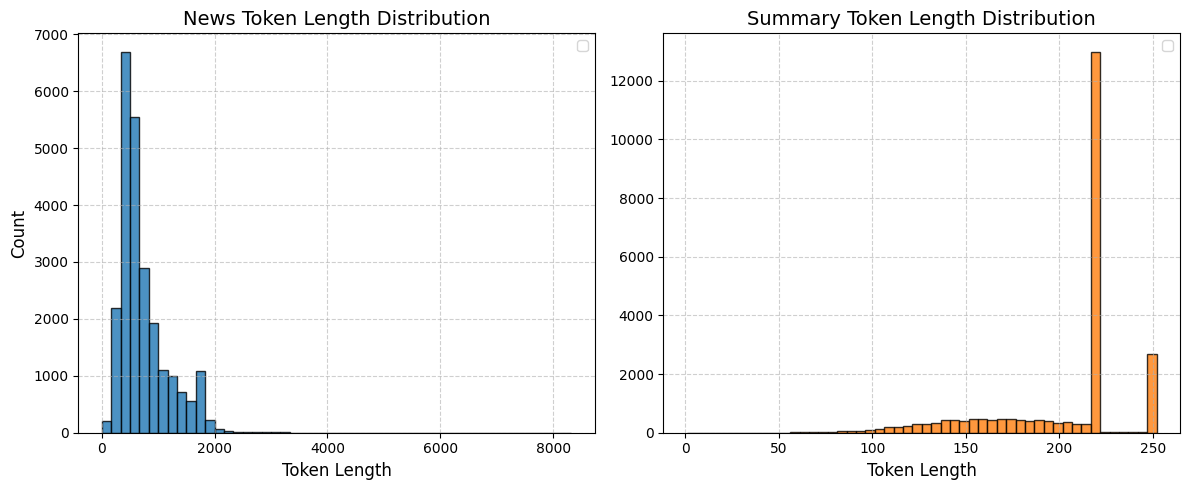

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Removed sharey=True

# Dialogue length histogram
axes[0].hist(c_len, bins=50, color="#1f77b4", edgecolor="black", alpha=0.8)
axes[0].set_title("News Token Length Distribution", fontsize=14)
axes[0].set_xlabel("Token Length", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Summary length histogram
axes[1].hist(s_len, bins=50, color="#ff7f0e", edgecolor="black", alpha=0.8)
axes[1].set_title("Summary Token Length Distribution", fontsize=14)
axes[1].set_xlabel("Token Length", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()


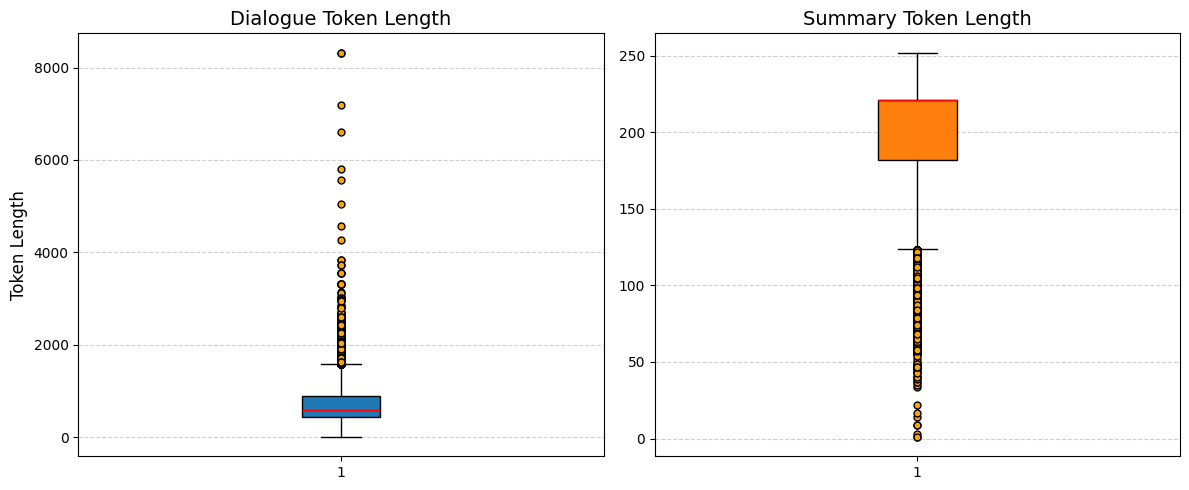

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dialogue length boxplot
axes[0].boxplot(c_len, patch_artist=True,
                boxprops=dict(facecolor="#1f77b4", color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))
axes[0].set_title("Dialogue Token Length", fontsize=14)
axes[0].set_ylabel("Token Length", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Summary length boxplot
axes[1].boxplot(s_len, patch_artist=True,
                boxprops=dict(facecolor="#ff7f0e", color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))
axes[1].set_title("Summary Token Length", fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
news_df['summary_length'] = s_len

In [ ]:
news_df['content_length'] = c_len

In [ ]:
news_df.head()

,author,content,datetime,source,summary,title,url,date,equity,hf_summary,extracted_summary,summary_length
0,Jayson Derrick,WeWork is postponing its initial public offeri...,2019-09-17 17:26:14,benzinga,WeWork is postponing its initial public offeri...,Analyst On WeWork: High Growth Equals High Cas...,https://www.benzinga.com/analyst-ratings/analy...,2019-09-18 17:26:14,MSFT,"WeWork, a shared-workspace provider, has put i...","WeWork, a shared-workspace provider, has put i...",251
1,Shanthi Rexaline,Microsoft Corporation (NASDAQ: MSFT ) reported...,2020-04-30 15:47:08,benzinga,Microsoft Corporation (NASDAQ: MSFT) reported ...,Microsoft Analysts On Redmond's Q3 Beat: 'A Co...,https://www.benzinga.com/analyst-ratings/analy...,2020-04-30 15:47:08,MSFT,**Key Events:**\n\n* Microsoft Corporation (MS...,**Key Events:**\n\n* Microsoft Corporation (MS...,250
2,Tanzeel Akhtar,Editor's note: This story has been updated to ...,2020-05-13 16:32:36,benzinga,Editor&#39;s note: This story has been updated...,What To Know About The Conflicting AMC Enterta...,https://www.benzinga.com/m-a/20/05/16014823/wh...,2020-05-14 16:32:36,AMZN,Key facts for financial investors:\n\n- AMC En...,Key facts for financial investors:\n\n- AMC En...,251
3,Chris Katje,Despite a wealth of 162.8 billion and title of...,2021-06-25 16:30:26,benzinga,Despite a wealth of $162.8 billion and title o...,Did Billionaire Elon Musk Sell All His Mansion...,https://www.benzinga.com/news/21/06/21714362/d...,2021-06-26 16:30:26,TSLA,Elon Musk's real estate portfolio is shrinking...,Elon Musk's real estate portfolio is shrinking...,251
4,Phil Hall,Elon Musk has taken his last remaining house o...,2021-09-20 15:52:05,benzinga,Elon Musk has taken his “last remaining house”...,Elon Musk Fails To Get Buyer For $37.5M Bay Ar...,https://www.benzinga.com/news/21/09/23013145/e...,2021-09-20 15:52:05,TSLA,Key points for financial investors:\n\n- The 1...,Key points for financial investors:\n\n- The 1...,251


In [ ]:
print(news_df['hf_summary'][378])

Microsoft Corp (MSFT) maintained its Buy rating from UBS analyst Karl Keirstead with a target price of $400. The analyst highlighted the reliance on Nvidia (NVDA) for GPUs, which is impacting


##b. Remove outliers

We remove the records which sastify either of 2 conditions:
- Token length exceeds 4000 token
- Summary token is under 50 token

In [ ]:
news_df_filtered = news_df[~((news_df['content_length'] > 4000) | (news_df['summary_length'] < 50))].copy()
print(f"Original number of rows: {len(news_df)}")
print(f"Number of rows after removing outliers: {len(news_df_filtered)}")

Original number of rows: 24338
Number of rows after removing outliers: 24300


In [ ]:
news_df_filtered.to_parquet('/content/drive/My Drive/NCKH/news_data/concatenated_news_filtered.parquet')

#3. Evaluate Summarization Quality with ROUGE & Bert score

In [ ]:
news_df = pd.read_parquet('/content/drive/My Drive/NCKH/news_data/concatenated_news_filtered.parquet')

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=52d6a4041d8480c21f9ac281bbd10a3468f44f52a8ef3e2d32859583f1c942ab
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
len(news_df)

24300

In [ ]:
sampled_news_df = news_df.sample(n=10000, random_state=42).reset_index(drop=True)
test_df = sampled_news_df[sampled_news_df['summary'].apply(lambda x: len(str(x).split()) >= 10)].copy()

In [ ]:
len(test_df)

4908

In [ ]:
from sentence_transformers import SentenceTransformer, util
from nltk.tokenize import sent_tokenize
import numpy as np
import torch
from tqdm.auto import tqdm


def compute_sbert_score(summary_sents, doc_sents, model):
    """Compute SBERTScore (Precision, Recall, F1) between two lists of sentences."""
    if not summary_sents or not doc_sents:
        return None, None, None

    emb_summary = model.encode(summary_sents, convert_to_tensor=True)
    emb_doc = model.encode(doc_sents, convert_to_tensor=True)
    sim_matrix = util.cos_sim(emb_summary, emb_doc)

    precision = sim_matrix.max(dim=1).values.mean().item()
    recall = sim_matrix.max(dim=0).values.mean().item()
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    return precision, recall, f1


def evaluate_batch(source_batch, summary_batch, model, base_index=0):
    """Evaluate a batch and keep per-record metrics."""
    results = []

    for idx, (doc, summ) in enumerate(zip(source_batch, summary_batch)):
        doc_sents = sent_tokenize(doc)
        summ_sents = sent_tokenize(summ)

        precision, recall, f1 = compute_sbert_score(summ_sents, doc_sents, model)
        if f1 is not None:
            results.append({
                "index": base_index + idx,
                "precision": precision,
                "recall": recall,
                "f1": f1,
                "document": doc,
                "summary": summ,
            })

    return results


def evaluate_dataset(source_texts, summaries, model, batch_size=32):
    """Evaluate SBERTScore over the dataset and collect full result records."""
    all_results = []

    for i in tqdm(range(0, len(source_texts), batch_size)):
        src_batch = source_texts[i : i + batch_size]
        sum_batch = summaries[i : i + batch_size]
        results = evaluate_batch(src_batch, sum_batch, model, base_index=i)
        all_results.extend(results)

    return all_results


def print_summary_statistics(results):
    """Print evaluation statistics."""
    precisions = [r["precision"] for r in results]
    recalls = [r["recall"] for r in results]
    f1s = [r["f1"] for r in results]

    avg_precision = float(np.mean(precisions))
    avg_recall = float(np.mean(recalls))
    avg_f1 = float(np.mean(f1s))
    std_f1 = float(np.std(f1s))

    print(f"\n--- SBERTScore Evaluation ---")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall:    {avg_recall:.4f}")
    print(f"F1 Score:  {avg_f1:.4f} ± {std_f1:.4f}")


def print_worst_cases(results, k=5):
    """Print the k worst-scoring summary-document pairs."""
    print(f"\n--- 🔍 Worst {k} Summaries ---")
    sorted_results = sorted(results, key=lambda x: x["f1"])

    for rank, record in enumerate(sorted_results[:k], 1):
        print(f"\n#{rank} | Index: {record['index']} | F1: {record['f1']:.4f}")
        print(f"Summary:\n{record['summary']}\n")
        print(f"Document (excerpt):\n{record['document'][:500]}...\n")  # Show first 500 chars




In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###SBERT Evaluation of generated summary in reference-free context

In [ ]:
# Main execution
if __name__ == "__main__":
    source_texts = sampled_news_df['content'].tolist()
    summaries = sampled_news_df['extracted_summary'].tolist()
    model = SentenceTransformer('all-MiniLM-L6-v2')

    results = evaluate_dataset(source_texts, summaries, model, batch_size=32)

    print_summary_statistics(results)
    print_worst_cases(results, k=10)  # Change k to see more

  0%|          | 0/313 [00:00<?, ?it/s]


--- SBERTScore Evaluation ---
Precision: 0.6428
Recall:    0.5414
F1 Score:  0.5824 ± 0.0856

--- 🔍 Worst 10 Summaries ---

#1 | Index: 2097 | F1: 0.1392
Summary:
No relevant information about Tesla's stock price is available in the article. However, the article contains the following information that may be relevant to the stock market or Tesla's parent company, Alphabet's (GOOGL) subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alphabet's subsidiary, Alph

###SBERT evaluation of Alpaca summary in reference-free context

In [ ]:
if __name__ == "__main__":
    source_texts = test_df['content'].tolist()
    summaries = test_df['summary'].tolist()
    model = SentenceTransformer('all-MiniLM-L6-v2')

    results = evaluate_dataset(source_texts, summaries, model, batch_size=32)

    print_summary_statistics(results)
    print_worst_cases(results, k=10)  # Change k to see more

  0%|          | 0/76 [00:00<?, ?it/s]


--- SBERTScore Evaluation ---
Precision: 0.8499
Recall:    0.3707
F1 Score:  0.5007 ± 0.1084

--- 🔍 Worst 10 Summaries ---

#1 | Index: 1997 | F1: 0.2179
Summary:
Note: This was updated with corrections at 12:10 PM EST.

Document (excerpt):
Note: This was updated with corrections at 12:10 PM EST . Elon Musk's Electric vehicle powerhouse Tesla Inc's (NASDAQ: TSLA ) Bitcoin (CRYPTO: BTC ) stash stands at 9,720 units after making sizable sales in early 2021 and mid-2022. What Happened : Tesla invested 1.5 billion into Bitcoin in early 2021, acquiring 43,200 BTC at an average price of approximately 34,722 per coin. Not long after, by March 2021, Tesla cashed in on Bitcoins surge, selling 10 of their holdings precisely 4,320 BTC at a wh...


#2 | Index: 59 | F1: 0.2202
Summary:
To gain an edge, this is what you need to know today.



Document (excerpt):
To gain an edge, this is what you need to know today. Hell To Pay Please click here for an enlarged chart of iShares 20 Year Treasury Bond

###Best-case test

In [ ]:
test_reference = ["On July 12, JPMorgan Chase reported stronger-than-expected Q2 earnings, with net income rising 18% year-over-year to $14.5 billion, driven by robust consumer banking activity and higher net interest income. Revenue climbed to $42.4 billion, beating analyst estimates of $41.3 billion. CEO Jamie Dimon highlighted resilient consumer spending and low credit delinquencies despite macroeconomic uncertainty. The bank’s net interest margin expanded to 3.34%, reflecting the benefit of elevated interest rates. Investment banking revenue fell 7% due to weaker IPO and M&A activity, but trading revenue rose 11%, led by strong fixed-income performance. JPMorgan also announced a $2 billion share buyback program, signaling confidence in its capital position. Operating expenses increased 5%, partly due to higher technology investments and regulatory compliance costs. The bank’s CET1 capital ratio improved to 14.6%, up from 13.8% last quarter. Management reaffirmed its full-year guidance and expects continued net interest income growth. Markets reacted positively, with JPM stock rising 2.3% in early trading."]
test_summary = ['JPMorgan Chase posted strong Q2 results, with earnings and revenue surpassing expectations thanks to solid consumer banking and higher interest income. While investment banking slowed, gains in trading and a $2 billion buyback reflect the bank’s financial strength. Management reaffirmed full-year guidance, boosting investor confidence and driving a 2.3% stock gain.']
results = evaluate_dataset(test_reference, test_summary, model, batch_size=1)
print_summary_statistics(results)

  0%|          | 0/1 [00:00<?, ?it/s]


--- SBERTScore Evaluation ---
Precision: 0.7476
Recall:    0.4968
F1 Score:  0.5969 ± 0.0000


In [ ]:
#Factual consistency
test_bad_summary = [
    "JPMorgan Chase reported a massive quarterly loss due to collapsing interest margins and a wave of consumer loan defaults. CEO Jamie Dimon announced plans to lay off 10,000 employees as part of a restructuring effort. Stock prices dropped sharply by 7% after the bank suspended its dividend program and projected negative earnings for the rest of the year."
]


In [ ]:
results = evaluate_dataset(test_reference, test_bad_summary, model, batch_size=1)
print_summary_statistics(results)

  0%|          | 0/1 [00:00<?, ?it/s]


--- SBERTScore Evaluation ---
Precision: 0.5322
Recall:    0.3962
F1 Score:  0.4542 ± 0.0000


In [ ]:
# Ensure the model is loaded (from a previous cell)
# model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the texts
emb_reference = model.encode(test_reference, convert_to_tensor=True)
emb_summary = model.encode(test_bad_summary, convert_to_tensor=True)

# Compute cosine similarity
similarity_matrix = util.cos_sim(emb_reference, emb_summary)

# Print the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

Cosine Similarity Matrix:
tensor([[0.7323]], device='cuda:0')


In [ ]:
test_same_length_fabricated_summary = [
    "JPMorgan Chase reported significant financial setbacks in Q2, with net income falling 22% due to sluggish consumer lending and a drop in net interest income. Total revenue declined to $38 billion, missing analyst forecasts. CEO Jamie Dimon expressed concern about rising default rates and soft retail demand amid ongoing economic pressures. The bank’s net interest margin narrowed to 2.85%, reflecting challenges from declining rates. Investment banking was a rare bright spot, increasing 9% due to a rebound in M&A activity. However, trading revenue plunged 13% amid lower market volatility. JPMorgan paused its buyback program to preserve capital, and operating expenses surged 8% driven by restructuring costs. The CET1 capital ratio fell to 13.2%, reflecting stress in the balance sheet. Management revised its full-year guidance downward and warned of continued headwinds. The market responded negatively, with JPM stock falling 4.1% during early trading."
]


In [ ]:
results = evaluate_dataset(test_reference, test_same_length_fabricated_summary, model, batch_size=1)
print_summary_statistics(results)

  0%|          | 0/1 [00:00<?, ?it/s]


--- SBERTScore Evaluation ---
Precision: 0.6592
Recall:    0.6460
F1 Score:  0.6525 ± 0.0000


In [ ]:
sentence_a = ["The man is riding a bicycle in the park."]
sentence_b = ["There is no man riding a bicycle in the park."]
print_summary_statistics(evaluate_dataset(sentence_a, sentence_b, model, batch_size = 1))

  0%|          | 0/1 [00:00<?, ?it/s]


--- SBERTScore Evaluation ---
Precision: 0.6024
Recall:    0.6024
F1 Score:  0.6024 ± 0.0000


In [ ]:
from transformers import pipeline
nli = pipeline("text-classification", model="facebook/bart-large-mnli")

Device set to use cuda:0


[{'label': 'contradiction', 'score': 0.9878800511360168}]


In [ ]:
print(nli([{"text": test_reference[0], "text_pair": test_summary[0]}]))

[{'label': 'entailment', 'score': 0.6200380921363831}]


In [ ]:
print(nli([{"text": test_reference[0], "text_pair": test_bad_summary[0]}]))

[{'label': 'contradiction', 'score': 0.9991176724433899}]
